## Deep Learning from Scratch 
****Chapter 3. 신경망****


In [81]:
import numpy as np
import matplotlib.pyplot as plt

In [82]:
# 활성 함수
# step function
def step_function(x):
    return np.array(x>0, dtype=np.int32)

def sigmoid_function(x):
    return 1 /(1 +  np.exp(-x))

def tanh(x):
    return np.tanh(x)
#
def relu(x):
    return np.maximum(0, x)

#
def softmax(x):
    #overflow 방지하기 위하여
    c = np.max(x)
    exp_a = np.exp(x - c)
    return exp_a/np.sum(exp_a)

# 항등함수
def identity_function(x):
    return x

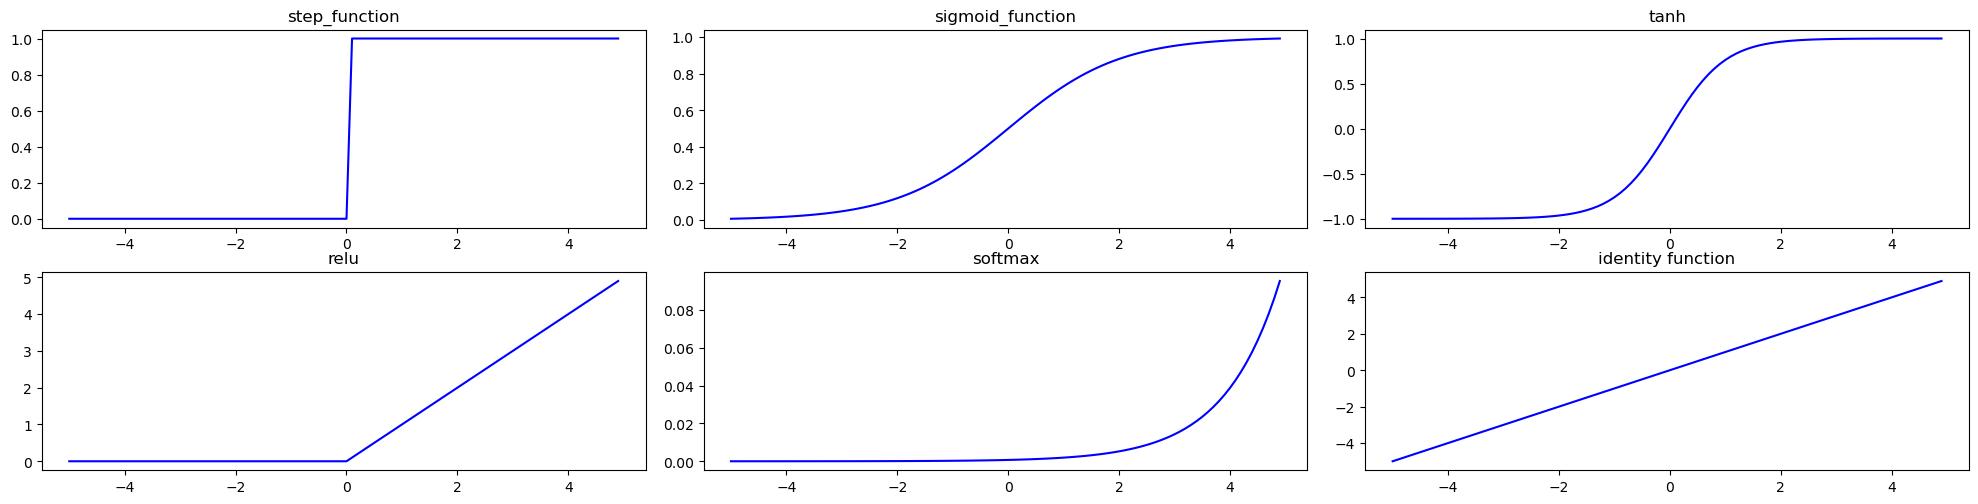

In [83]:
plt.subplots(2, 3, figsize=(20,5))
plt.tight_layout()
# 그래프로 각 활성 함수 모양 확인
x = np.arange(-5, 5, 0.1)
y = step_function(x)
plt.subplot(2, 3, 1)
plt.plot(x, y, color='blue')
# plt.axhline(0, color='k')
# plt.axvline(0, color='k')
plt.title('step_function')

y = sigmoid_function(x)
plt.subplot(2, 3, 2)
plt.plot(x, y, color='blue')
plt.title('sigmoid_function')

y = tanh(x)
plt.subplot(2, 3, 3)
plt.plot(x, y, color='blue')
plt.title('tanh')

y = relu(x)
plt.subplot(2, 3, 4)
plt.plot(x, y, color='blue')
plt.title('relu')

y = softmax(x)
plt.subplot(2, 3, 5)
plt.plot(x, y, color='blue')
plt.title('softmax')

y = identity_function(x)
plt.subplot(2, 3, 6)
plt.plot(x, y, color='blue')
plt.title('identity function')

plt.show()

***3층 신경망 구현하기***
- 각 인자의 shape 에 주의함.

In [84]:
# 입력 (2, )
X = np.array([1.0, 0.5])
# 가중치 (2, 3)
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
# Bias (3, )
B1 = np.array([0.1, 0.2, 0.3])

# 입력층에서 1층으로 신호 전달
# 내적은 순서에 주의함.
A1 = np.dot(X, W1) + B1
# 활성 함수
Z1 = sigmoid_function(A1)
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [85]:
# 1층에서 2층으로 신호 전달
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid_function(A2)
print(A2)
print(Z2)

[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


In [86]:
# 2층에서 3층으로 신호 전달
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
print(A3)
print(Y)

[0.31682708 0.69627909]
[0.31682708 0.69627909]


### 숫자 분류에 적용하기 ###

In [87]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

5


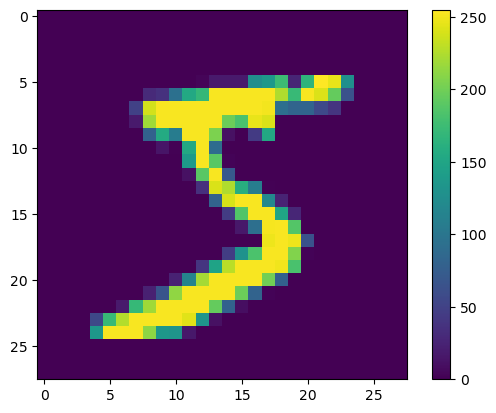

In [88]:
print(y_train[0])
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)


In [91]:
import pickle

# 저장된 학습된 가중치 매개변수를 가져온다.
def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    # print(f'{network}')
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid_function(a1)

    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid_function(a2)

    a3 = np.dot(a2, W3) + b3
    y = softmax(a3)
    return y

network = init_network()
x_test = x_test

accuracy_cnt = 0
for i in range(len(x_test)):
    y = predict(network, x_test[i])
    p = np.argmax(y)

    if p == y_test[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt)/len(x_test)))

accuracy_cnt = 0
batch_size = 100

for i in range(0,len(x_test), batch_size):
    x_batch = x_test[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == y_test[i:i+batch_size])
    
print("Batch Accuracy:" + str(float(accuracy_cnt)/len(x_test)))


/tmp/ipykernel_4345/2842262036.py:7: RuntimeWarning: overflow encountered in exp
  return 1 /(1 +  np.exp(-x))


Accuracy:0.8923
Batch Accuracy:0.8923
